In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'Dejavu Serif'

In [2]:
# params

g = 9.81
rhoConst = 1000

loadLoc = "/scratch/hcm7920/amb0-smallStep/data/"

deepIndex = 30

In [19]:
# load data

data = nc.Dataset(loadLoc+"state.nc")
salt = data["S"][1500:2500:5,:deepIndex,200:300,250]
levs = data["Z"][:deepIndex]
time = data["T"][1500:2500:5]


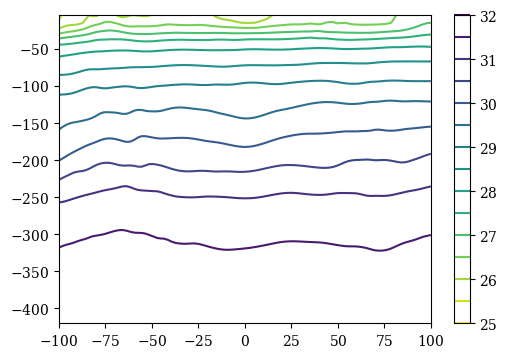

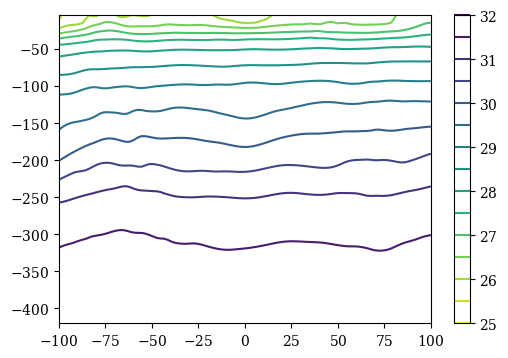

In [12]:
# plot some snapshots

data = salt[100,:,:]
myMax = data.max().round(0)
myMin = data.min().round(0)
myLevs = np.linspace(myMin,myMax,2*7+1)
yGrid = np.linspace(-100,100,100)

plt.figure(figsize=(6,4))
plt.contour(yGrid,levs,data,myLevs,
           cmap="viridis_r")
plt.colorbar()

plt.figure(figsize=(6,4))
data = salt[101,:,:]
plt.contour(yGrid,levs,data,myLevs,
           cmap="viridis_r")
plt.colorbar()



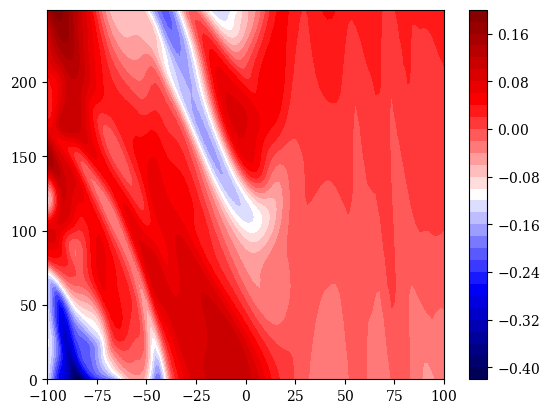

In [22]:
# plot a hovmuller

data = salt[:,15,:]
myMean = data.mean((0))
data = data - myMean[np.newaxis,:]

plt.contourf(yGrid,(time-time[0])/3600,data,30,
            cmap="seismic")
plt.colorbar()
